In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1['area_type'].describe()

count                    13320
unique                       4
top       Super built-up  Area
freq                      8790
Name: area_type, dtype: object

In [5]:
df1.groupby("area_type")['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df1.drop(['area_type','availability','society','balcony'], axis = 1, inplace = True)

In [7]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [8]:
df2 = df1.copy()

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df2['bath'] = df2['bath'].fillna(df2['bath'].mean())

In [12]:
df3 = df2.dropna()

In [13]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df3["BHK"] = df3['size'].apply(lambda x : int(x.split(" ")[0]))
df3.head()

C:\Users\biswa\AppData\Local\Temp\ipykernel_15964\3159624134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["BHK"] = df3['size'].apply(lambda x : int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [17]:
df3[df3.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
df3[df3['BHK']>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


### Here some outliers are present beacuse in 2400 sq area 43 bedrooms are not present

In [19]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

## i see that some where total_sqft feature has value in range that should be convert into a ingle value 

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True  

In [21]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.00000,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.69261,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.69261,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.00000,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.00000,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.00000,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.00000,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.69261,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.00000,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.00000,63.770,2


In [22]:
def conver_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
df4 = df3['total_sqft'].apply(conver_sqft_to_num)

In [24]:
df5 = df3.copy()

In [25]:
df5['total_sqft'] = df5['total_sqft'].apply(conver_sqft_to_num)

In [26]:
df5

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [27]:
df5.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [28]:
df5.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
BHK                 1
Name: 410, dtype: object

In [29]:
df5['total_sqft'].info()

<class 'pandas.core.series.Series'>
Index: 13303 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype  
--------------  -----  
13257 non-null  float64
dtypes: float64(1)
memory usage: 723.9 KB


In [30]:
df6 = df5.copy()

In [31]:
df6['Price_per_Area'] = df6['price']*100000/df6['total_sqft']
df6.head()

,location,size,total_sqft,bath,price,BHK,Price_per_Area
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [32]:
len(df6['location'].unique())

1304

In [33]:
df6.location = df6['location'].apply(lambda x: x.strip())

location_status = df6.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_status

location
Whitefield                   540
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               273
Thanisandra                  237
                            ... 
adigondanhalli                 1
akshaya nagar t c palya        1
anjananager magdi road         1
arudi                          1
2Electronic City Phase II      1
Name: location, Length: 1293, dtype: int64

In [34]:
len(location_status[location_status<=10])

1052

In [35]:
location_status_less_than_10 = location_status[location_status<=10]
location_status_less_than_10

location
Sadashiva Nagar              10
Kalkere                      10
1st Block Koramangala        10
BTM 1st Stage                10
Basapura                     10
                             ..
adigondanhalli                1
akshaya nagar t c palya       1
anjananager magdi road        1
arudi                         1
2Electronic City Phase II     1
Name: location, Length: 1052, dtype: int64

In [36]:
len(df6['location'].unique())

1293

In [37]:
df6['location'] = df6['location'].apply( lambda x :"others" if x in location_status_less_than_10 else x)
len(df6.location.unique())

242

In [38]:
df6

,location,size,total_sqft,bath,price,BHK,Price_per_Area
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


## Removal of Outliers 

In [39]:
df6[df6.total_sqft/df6.BHK <300].head()

,location,size,total_sqft,bath,price,BHK,Price_per_Area
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [40]:
df6 = df5[~(df5.total_sqft/df5.BHK <300)]

In [41]:
df6.shape

(12559, 6)

In [42]:
df6

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [43]:
df6['price_per_sqft'] = df6['price']*100000 / df6['total_sqft']

C:\Users\biswa\AppData\Local\Temp\ipykernel_15964\1510722949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['price_per_sqft'] = df6['price']*100000 / df6['total_sqft']


In [44]:
df6

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [45]:
df6.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [46]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out
df7 = remove_pps_outliers(df6)

    

In [47]:
df7.shape

(9303, 7)

In [48]:
df7['price_per_sqft'].describe()

count     9303.000000
mean      5726.788746
std       2534.168087
min       1250.000000
25%       4260.684326
50%       5188.679245
75%       6406.349438
max      35000.000000
Name: price_per_sqft, dtype: float64

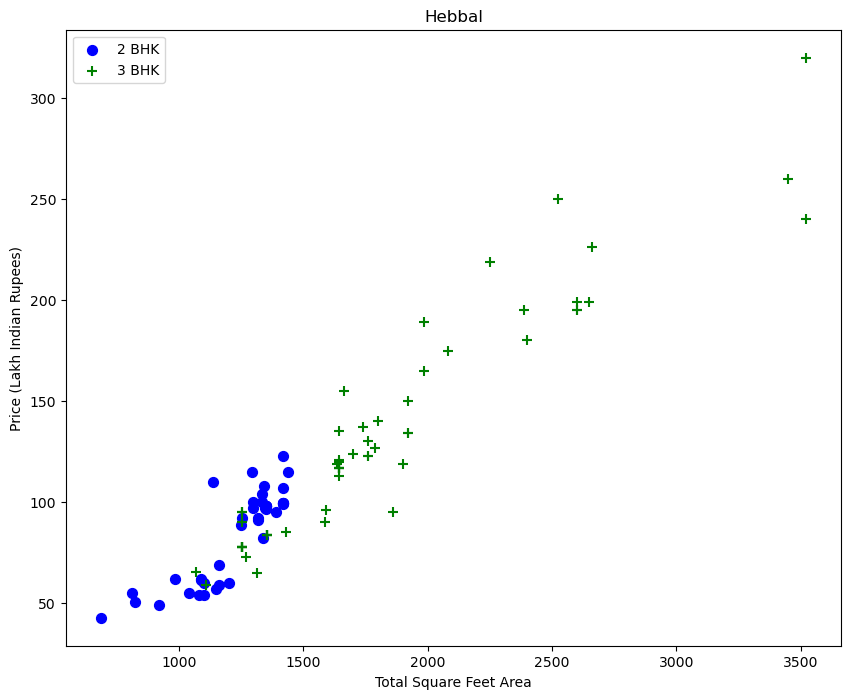

In [49]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]

    plt.figure(figsize=(10,8))
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7, "Hebbal")


In [50]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])

    for location, location_df in df.groupby('location'):
        bhk_stats = {}

        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        # Compare BHK with BHK+1
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk - 1)

            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values
                )

    return df.drop(exclude_indices, axis='index')


df8 = remove_bhk_outliers(df7)
df8.shape

(7532, 7)

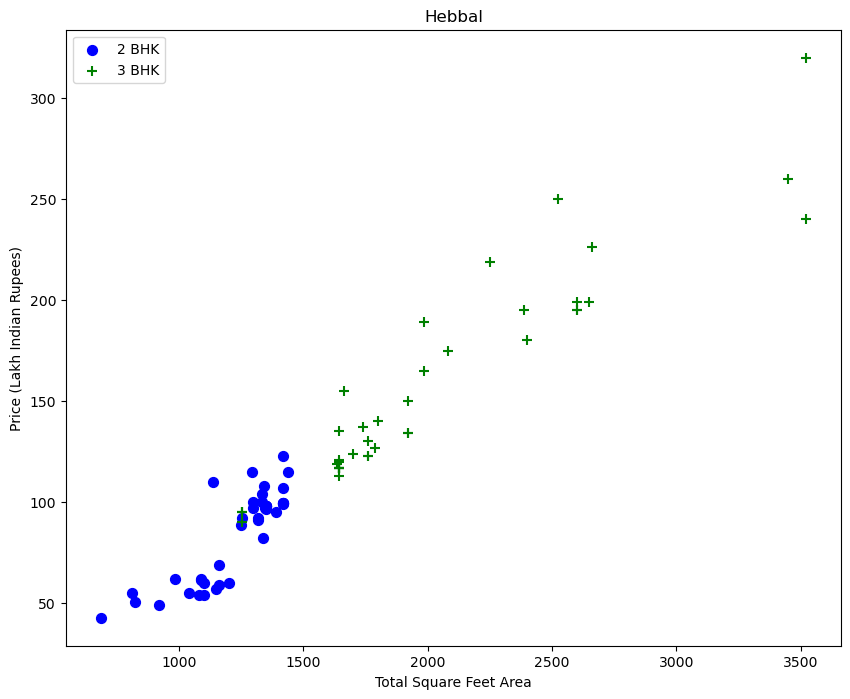

In [51]:
plot_scatter_chart(df8, "Hebbal")


Text(0, 0.5, 'Counts')

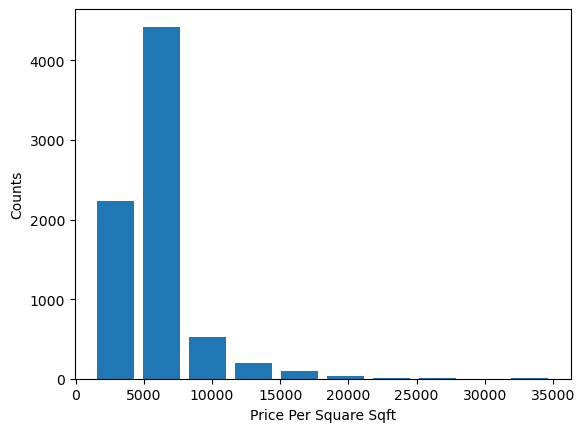

In [54]:
plt.hist(df8.price_per_sqft,rwidth =0.8)
plt.xlabel("Price Per Square Sqft")
plt.ylabel("Counts")


In [55]:
df8['bath'].unique()

array([ 3.        ,  2.        ,  1.        ,  4.        ,  5.        ,
        8.        ,  9.        ,  6.        , 14.        ,  2.69260965,
        7.        , 12.        ])

In [56]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
779,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
6210,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000


## here outliers are present like in flat no of bathroom is greater than the number of the house present in the flat  . so now we need to resokve it 

Text(0, 0.5, 'Count')

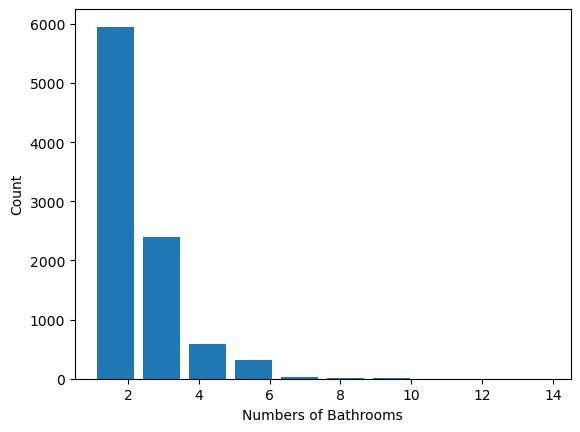

In [57]:
plt.hist(df7.bath,rwidth = 0.8)
plt.xlabel("Numbers of Bathrooms")
plt.ylabel("Count")

## so if bathrooms are greater than existing rooms then i can treat them as a outliers


In [59]:
df8[df8.bath>df8.BHK+2].count()

location          5
size              5
total_sqft        5
bath              5
price             5
BHK               5
price_per_sqft    5
dtype: int64

In [61]:
df9 = df8[df8.bath<df8.BHK+2]

In [63]:
df9.shape

(7453, 7)

In [65]:
df9.to_csv("clean_data.csv", index=False)

print("Cleaned data saved successfully!")

Cleaned data saved successfully!


In [67]:
new_df= df9.drop("size",axis =1)

In [69]:
new_df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
Index: 7453 entries, 0 to 9302
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        7453 non-null   object 
 1   total_sqft      7453 non-null   float64
 2   bath            7453 non-null   float64
 3   price           7453 non-null   float64
 4   BHK             7453 non-null   int64  
 5   price_per_sqft  7453 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 407.6+ KB


In [71]:
new_df.to_csv("Cleaned Real Estate Data.csv",index =True)
print("Done Bro I Proud Of You")

DOne Bro I Proud Of You
